# `xlsxwriter` plus `pandas`

So far, we've been concocting Excel worksheet out of Python structures called *lists*:

```
my_list = [1,2,3]
my_other_list = ['Red','Blue','Green']
```

However, you are probably more used to seeing data stored in structures like this:

![Example DataFrame](images/pandas-dataframe.png)

*[Image source](https://www.oreilly.com/content/data-indexing-and-selection/)*

This is an example of *tabular* data, with *rows* and *columns*. You use it in spreadsheets all the time!

When you hear tabular data in Python, think `pandas`. 

We used `pandas` earlier to read data from Excel, operate on it, and write the results into another workbook.

Now, let's combine the powers of `xlsxwriter` with `pandas` to create powerful, automated data analysis with Python and Excel. 

First, let's create a small DataFrame of the land areas of the boroughs of New York City:

In [1]:
import pandas as pd
import xlsxwriter

# Create a DataFrame of land sizes of NYC boroughs
data = {'borough':['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],'land_area':[42.10,70.82,22.83,108.53,58.37]}

df = pd.DataFrame(data)

# Doesn't this look familiar?
df


,borough,land_area
0,The Bronx,42.10
1,Brooklyn,70.82
2,Manhattan,22.83
3,Queens,108.53
4,Staten Island,58.37


Let's say we wanted to load this DataFrame into a workbook and format the output with `xlsxwriter`.

Unfortunately, `pandas` DataFrames take a couple of extra steps to use with `xlsxwriter`. Here are our steps:

1. Set the `pandas` Excel-writing engine to `xlsxwriter` with `ExcelWriter()`.  
2. Convert the DataFrame into an `xlsxwriter` object with `to_excel()`.  
3. Create workbook and worksheet objects for the resulting output with `writer.book` and `writer.sheets`.

Let's take a look: 

In [ ]:
# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('nycland.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1')

# Get the xlsxwriter objects from the DataFrame writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

Were you to close your workbook now, you would see something like the below.

![DataFrame index visible in Excel export](images/nyc-land-index.png)


-  By default, our DataFrame will be written starting in `A1` of the worksheet. To write it elsewhere, check out this [`pandas` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html).  


-  The numbers in column `A` represent the ***index*** of the DataFrame. Indexes are great for hleping us access and manipulate data in `pandas`, but aren't so helpful in our finished Excel export. 


We can hide the index from displaying by including `Index = False` in our `to_excel()` method.

Let's try this again:

In [ ]:
# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('nycland.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
### index = 'False' ###
df.to_excel(writer, sheet_name='Sheet1', index=False)

# Get the xsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

workbook.close()

# Drill

1. Place the steps in order for writing a `pandas` DataFrame into an `xlsxwriter` workbook. 

- Create workbook and worksheet objects for the resulting output with `writer.book` and `writer.sheets`.
- Convert the DataFrame into an `xlsxwriter` object with `to_excel()`.  
- Set the `pandas` Excel-writing engine to `xlsxwriter` with `ExcelWriter()`.  



2. Fill out the below code to write this DataFrame to a workbook named `hr.xlsx` and worksheet named `leaders`. 

In [ ]:
import pandas as pd
import xlsxwriter

# Create a DataFrame
data = {'player':['Barry', 'Hank', 'Babe', 'Alex', 'Wille'],'hr':[762,755,714,696,660]}
df = pd.DataFrame(data)

# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter(___, engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, ___=___, index=False)

# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets[___]

# Close the workbook
workbook.close()

## Customizing `pandas` output with `xlsxwriter`

You may remember that we were writing `pandas` DataFrames to Excel back at the beginning of this course. Why do it this newfangled way now?

The benefit of sending our DataFrame to `xlsxwriter` is that we can now add any formatting and analysis to the workbook in ways that would be difficult or impossible in `pandas`. 

You've already learned several useful methods for customizing workbooks from Python. Let's learn one more. 

## Conditional formatting

Conditional formatting is a great way to add visual elements to data analysis.  

The usual disclaimer applies: You'll just get a taste of the possibilities here. For more information on conditional formatting in `xlsxwriter`, check out Chapter 22 of the [`xlsxwriter` guide](https://github.com/jmcnamara/XlsxWriter/blob/master/docs/XlsxWriter.pdf). 

In [74]:
import pandas as pd 
import xlsxwriter

# pandas can read in data from most any source
cities = pd.read_csv("https://raw.githubusercontent.com/summerofgeorge/training-assets/master/largest-us-cities.csv")

# Convert our population field to be numeric
cities['population'] = pd.to_numeric(cities['population'], errors='coerce')

# Print the first few rows
cities.head()

,city,population,pop_change,land_area
0,New York,8336817,0.0198,301.5
1,Los Angeles,3979576,0.0493,468.7
2,Chicago,2693976,-0.0006,227.3
3,Houston,2320268,0.1048,637.5
4,Phoenix,1680992,0.1628,517.6


## Creating workbook calculations from `pandas`

At the beginning of the class we talked about using Python and Excel *together* to make awesome data products. 

Let's discuss a bit further about how to draw the "division of labor" between these tools:

*If it has to do with data analysis, manipulation or visualization, use Python.*

*If it has to do with workbook formatting, presentation and end-user interaction, use Excel.*

We would like to add a column to our table expressing population density. We could do this in either Excel or Python, but generally, unless the end-user absolutely has to have the formulas written out in Excel, any calculations we perform should be conducted in Python. 

Fortunately, `pandas` makes it quite easy to create calculated columns. 

In [75]:
# Create rounded population density column in our cities table

cities['density'] = cities['population']/cities['land_area']

# Check out our new column
cities.head()

,city,population,pop_change,land_area,density
0,New York,8336817,0.0198,301.5,27651.134328
1,Los Angeles,3979576,0.0493,468.7,8490.667805
2,Chicago,2693976,-0.0006,227.3,11852.072151
3,Houston,2320268,0.1048,637.5,3639.636078
4,Phoenix,1680992,0.1628,517.6,3247.666151


Remember that the way our data looks here in `pandas` is pretty much the way it will look in Excel! So let's clean up our cell formatting as we write to the workbook.

We've been writing our custom cell formats in as we wrote data. But with `pandas`, we will be writing all our data in at once, and *then* going back to format it.

We can apply cell formatting to columns without writing to them with the `set_column()` method. This is what we used to increase column widths.

In [76]:
# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('us-cities.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
cities.to_excel(writer, sheet_name='Sheet1',index=False)

# Get the xlsxwriter objects from the DataFrame writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Set up cell formatting 
thousands_format = workbook.add_format({'num_format':'#,##0'})
pct_format = workbook.add_format({'num_format':'0.00%'})

# Format our columns -- we will also set the column width here
worksheet.set_column('A:A',12)
worksheet.set_column('B:B', 10, thousands_format)
worksheet.set_column('C:C', 10, pct_format)
worksheet.set_column('D:E', 10, thousands_format)

0

### The basics of conditional formatting.

To add conditional formatting to our worksheet, we will apply the `conditional_format()` method to our selected cells. 

#### Greater than/less than

We would like to format all of our density values greater than 500 miles as <font color='green'>green</font>.

To do so, we will pass a dictionary of our conditional formatting settings and apply that to the range `D2:D11`.

As we've done before, we will set a workbook cell format and then include that as our option for cell formatting. 

In [70]:
# Set green fill with dark green text format.
# bg_color will set the cell fill by hex code
green_format = workbook.add_format({'bg_color': '#C6EFCE',
'font_color': '#006100'})


worksheet.conditional_format('D2:D11', {'type': 'cell',
'criteria': 'greater than',
'value': 500,
'format': green_format})

#### Top *n*/Bottom *n*

We can also find the top or bottom *n* values in a range.

Let's find the three most and least densely-populated cities, setting them with red and green formats, respectively. 

In [71]:
# Set top three values to red
worksheet.conditional_format('E2:E11',{'type':'top',
'value':3,
'format':green_format})

# Now we want a red format
red_format = workbook.add_format({'bg_color': '#FFC7CE',
'font_color': '#9C0006'})

# Apply red format to bottom 3
worksheet.conditional_format('E2:E11',{'type':'bottom',
'value':3,
'format':red_format})

#### Data bar

We will now add data bars to our population column. Fortunately this time, the formatting is already made for us 🎉.

There are ways to customize the data bar settings -- check the documentation for more.

In [72]:
# Format range with data bars
worksheet.conditional_format('A2:A11', {'type': 'data_bar'})

#### Color scales

Similarly, we can apply a pre-set format color scale. Let's try it on the population change column. We will apply a three-color scale:

In [73]:
# Format range with color scale
worksheet.conditional_format('C2:A11', {'type': '3_color_scale'})

# That's a wrap!
workbook.close()

# Drill

Complete the code scaffolding to format the following:

- Format the cells of boroughs with a land area greater than 50 square miles with a green format.
- Add a two-grade color scale to the population column.  



In [1]:
import pandas as pd
import xlsxwriter

# Create a DataFrame of land sizes of NYC boroughs
data = {'borough':['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],'land_area':[42.10,70.82,22.83,108.53,58.37],'population':[1418207,2559903,1628706,2253858,476143]}

nyc = pd.DataFrame(data)

# Set Pandas engine to xlsxwriter
writer = ___('nyc.xlsx', engine=___)

# Convert the dataframe to an XlsxWriter Excel object.
nyc.to_excel(___, sheet_name='Sheet1', index=False)

# Get the xlsxwriter objects from the dataframe writer object
workbook  = ___
worksheet = ___.sheets['Sheet1']


# Set green fill with dark green text format
green_format = workbook.add_format({'bg_color': '#C6EFCE',
'font_color': '#006100'})

# Format cells of boroughs with land area over 50 sq miles
# with green format
worksheet.___('B2:B6', {'type': 'cell',
'criteria': 'greater than',
'value': ___,
'format': ___})

# Format two-grade color scale to the population cells
worksheet.conditional_format('C2:C6', {___: '2_color_scale'})

# Close the workbook
___

# `xlsxwriter` and data visualization

Now that we are starting to operate on familiar "worksheet"-like data structures with `pandas` and `xlsxwriter`, let's dive into an important method of data analysis: *data visualizations*.

## Writing Excel charts from `xlsxwriter`

It is possible to write Excel charts right from Python. Let's set up our data and see:


In [8]:
import pandas as pd
import xlsxwriter

# Create a DataFrame of land sizes of NYC boroughs
data = {'borough':['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],'land_area':[42.10,70.82,22.83,108.53,58.37]}

nyc = pd.DataFrame(data)

# Sort this DataFrame
nyc = df.sort_values(by=['land_area'])

# Set pandas engin
writer = pd.ExcelWriter('nyc-charts.xlsx',engine='xlsxwriter')

# Convert the dataframe to xlsxwriter object
nyc.to_excel(writer, sheet_name='Sheet1', index=False)

# Get the xsxwriter objects from the writer
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

### Inserting Excel charts from `xlsxwriter`

As you may expect at this point, it will take a few steps to insert this chart: 

1. Add the chart with `add_chart()`.  

2. Add the series with `add_series()`  


3.  
    a.  Set a chart title with `set_title()`.  

    b.  Set an x-axis label with `set_x_axis()`. 
 
    c.  Set a y-axis label with `set_y_axis()`.  



4.  Insert the chart into the worksheet with `insert_chart()`.  

There are some other possibilities here, such as setting a chart style or a secondary series. Check [Chapter 18 of the `xlsxwriter` documentation](https://github.com/jmcnamara/XlsxWriter/blob/master/docs/XlsxWriter.pdf).

In [9]:
# 1. Add the chart with `add_chart()`
# Assign this to a variable so we can refer to it for
# subsequent steps
nyc_chart = workbook.add_chart({'type': 'bar'})

# 2. Add the series with `add_series()`
nyc_chart.add_series({
# 'name' is the name of our variable
'name': '=Sheet1!$B$1',
# 'categories' are our observation labels
'categories': '=Sheet1!$A$2:$A$6',
# 'values' are our variable values
'values': '=Sheet1!$B$2:$B$6',
})

# 3a. Set a chart title with `set_title()`
nyc_chart.set_title ({'name': 'Land area of NYC boroughs'})

# 3b. Set an x-axis label with `set_x_axis()`
nyc_chart.set_x_axis({'name': 'Borough'})

# 3c. Set a y-axis label with `set_y_axis()`
nyc_chart.set_y_axis({'name': 'Land area (square miles)'})

# 4. Insert the chart to worksheet with `insert_chart()`
worksheet.insert_chart('E1', nyc_chart)

Were you to close the workbook connection now, you would see something like the below.


![NYC boroughs with Excel chart](images/nyc-land-excel-chart.png)

### Writing Python charts to Excel

It's great to write Excel charts right from Python.

We also have the ability to use Python's rich data visualization capabilities and write the results to Excel.

Let's create the same bar chart as above, but using the popular [`matplotlib.pyplot()` data visualization module](https://matplotlib.org/api/pyplot_api.html). 

This is *not* a course on building visualizations or understanding modules in Python. 

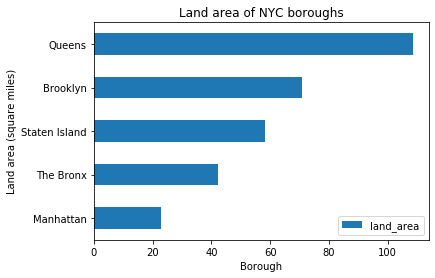

In [10]:
# Import the module
import matplotlib.pyplot as plt

# Create a bar chart
df.plot.barh(x="borough",y="land_area",title="Land area of NYC boroughs")


# Set x- and y-axis
plt.xlabel('Borough')
plt.ylabel('Land area (square miles)')


# Save the image-- we will need this for later
plt.savefig('nyc-land.png', bbox_inches='tight', dpi = (200))

# Show the bar chart in our console
plt.show()

We can't write a plot directly into `xlsxwriter`. Instead, we will save an image of the plot, and write the image using the `insert_image()` method.

In [11]:
# Add the image to the workbook
worksheet.insert_image('E17', 'nyc-land.png')

# Close the workbook and admire your creation!
workbook.close()

# Drill: 

Insert a DataFrame and scatterplot in Python. 

I will fill out the information to complete the scatterplot -- you focus on the `xlsxwriter`-related parts. 

In [12]:
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt

# Create a DataFrame of land sizes of NYC boroughs
mpg = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

# View first rows of data 
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [ ]:
# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('mpg.xlsx', ___)

# Convert the dataframe to an XlsxWriter Excel object.
# Do not display the index when we export
# Name the worksheet 'data'.
mpg.to_excel(___, sheet_name=___, ___=___)

# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets[___]

# Let's freeze the pane of this worksheet while we're at it
___.freeze_panes(___)

# Set column widths
worksheet.set_column('A:I',12)

In [ ]:
### This code is finished ###
# Create a bar chart
mpg.plot.scatter(x="horsepower",y="mpg",title="Horsepower versus mileage")


# Set x- and y-axis
plt.xlabel('Horsepower')
plt.ylabel('Mileage (miles per gallon)')


# Save the image-- we will need this for later
plt.savefig('mpg.png', bbox_inches='tight', dpi = (400))

# Show the bar chart in our console
plt.show()

In [ ]:
# Create a new worksheet called `scatter`
worksheet2 = ___

# Add the image `mpg.png` to the workbook
___.insert_image('A1', 'mpg.png')

# Close the workbook and admire your creation!
___

# Capstone: Python & Excel for data analysis

It is so powerful to combine the seamless data preparation and analysis functionalities of Python with the end-user accessibility of Excel.

Let's look at one final example where we will combine many of the skills learned in this section to make a correlation heatmap in Excel.

Again, the focus of this course is on learning `xlsxcode`, but you have been getting smatterings of other packages, namely `pandas`. I hope this course gets you excited about the possibilities of learning Python, and you can see it's already within your reach!

We will make a correlation matrix below, but hide the zeros from the diagonals. Our reason for doing so is that we do not want the 1's to skew the other values in our heatmap.

In [3]:
import xlsxwriter
import pandas as pd
# We will need one more package here
import numpy as np

# Read in our dataset
athletes = pd.read_excel("data/athletes.xlsx")

# Make a correlation matrix
athletes_corr = athletes.corr()
# Round the numbers to two decimals
athletes_corr = athletes_corr.round(2)
# Fill the diagonals with a 2
np.fill_diagonal(athletes_corr.values, 2)
# Replace the 2's with blank values 
# -- This will remove the 1's from the diagonals
athletes_corr = athletes_corr.replace(2,"")

athletes_corr

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
rcc,,0.15,0.92,0.89,0.25,0.3,-0.4,-0.49,0.55,0.36,0.4
wcc,0.15,,0.15,0.13,0.13,0.18,0.14,0.11,0.1,0.08,0.16
hc,0.92,0.15,,0.95,0.26,0.32,-0.45,-0.53,0.58,0.37,0.42
hg,0.89,0.13,0.95,,0.31,0.38,-0.44,-0.53,0.61,0.35,0.46
ferr,0.25,0.13,0.26,0.31,,0.3,-0.11,-0.18,0.32,0.12,0.27
bmi,0.3,0.18,0.32,0.38,0.3,,0.32,0.19,0.71,0.34,0.85
ssf,-0.4,0.14,-0.45,-0.44,-0.11,0.32,,0.96,-0.21,-0.07,0.15
pcBfat,-0.49,0.11,-0.53,-0.53,-0.18,0.19,0.96,,-0.36,-0.19,-0
lbm,0.55,0.1,0.58,0.61,0.32,0.71,-0.21,-0.36,,0.8,0.93
ht,0.36,0.08,0.37,0.35,0.12,0.34,-0.07,-0.19,0.8,,0.78


We will now do what we've done a bunch of times... write a DataFrame to Excel. We will also add conditional formatting to our table to effectively make a heatmap.

In [4]:
# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('athletes-corr.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
athletes_corr.to_excel(writer, sheet_name='Sheet1', index=False)

# Get the xsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Conditional formatting 
worksheet.conditional_format('A2:K12', {'type': '3_color_scale'})

# Close worksheet
workbook.close()

You may be familiar with VBA code in Python. Most of the tasks we've done today such as hiding worksheets or formatting ranges could be done in VBA. 

However, VBA does not have easy access to a rich universe of data manipulation and data visualization packages like Python. I see this as one of the giant wins of Python-Powered Excel.

## Back to the slides...

Our time on Jupyter is ended for today, but I hope you come back and visit often. These resources will remain available to you. 

Now back to the slides to wrap up our discussion. 